<a href="https://colab.research.google.com/github/JennEsquivel/EDP1/blob/main/grafica4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


**Gráficas del problema de Dirichlet**

Elaboró: Jennifer Esquivel Saldaña

Graficar para la ecuación:

$\frac{\partial^2 u}{\partial \:x^2}=\frac{\partial ^2u}{\partial y^2}, 0<x<1, 0<y<1$

para las condiciones:

$u(0,y)=10y, $
$\frac{\partial u\left(1,y\right)}{\partial x}=-1, $
$u(x,0)=0, $
$u(x,1)=0 $


Graficamos las condiciones u(0,y)=10y, u_x(1,y)=-1:

In [20]:
from pylab import *
import math 

In [ ]:
def recta_1(x):
    y = zeros(len(x))
    for i in range(len(x)):
        y[i] = (10*x)[i]
    return y
def recta_2(x):
    y=zeros(len(x))
    for i in range(len(x)):
        y[i] = -1
    return y

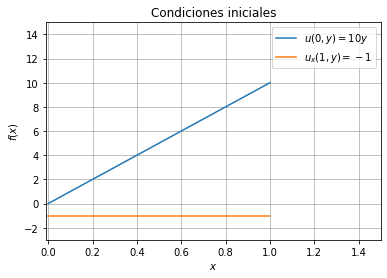

In [ ]:
x= linspace(0,1,1000)
x_1 = linspace(0,1,1000)
f_1 = recta_1(x_1)
x_2= linspace(0,1,1000)
f_2 = recta_2(x_2)
plot(x_1,f_1,label='$u(0,y)=10y$')
plot(x_2,f_2,label='$u_x(1,y)=-1$')
plt.xlabel('$x$'); plt.ylabel('$f(x)$'); 
plt.title("Condiciones iniciales")
xlim([-0.01,1.5]),ylim([-3,15]),grid(),legend()
show()

Aproximamos las condiciones anteriormente graficadas con ayuda de la serie de Fourier.

In [ ]:
def u_0(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += 20.0*(0-cos(n*pi))*sin(n*pi*x)/(n*pi)
    return f
def u_1(x,N=20): # N es el número de armónicos
    f = zeros(len(x))
    for n in range(1,N):
        f += 2.0*(cos(n*pi)-1)*sin(n*pi*x)/(n*pi)
    return f

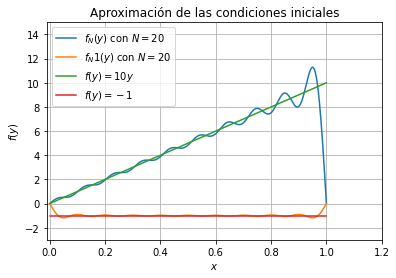

In [ ]:
f_n1 = u_1(x)
f_n = u_0(x)
plot(x,f_n,label='$f_N(y)$ con $N=20$')
plot(x,f_n1,label='$f_N1(y)$ con $N=20$')
plot(x_1,f_1,label='$f(y)=10y$ ')
plot(x_2,f_2,label='$f(y)=-1$')
plt.xlabel('$x$'); plt.ylabel('$f(y)$'); 
plt.title("Aproximación de las condiciones iniciales")
xlim([-0.01,1.2]),ylim([-3,15]),grid(),legend()
show()

Se pueden unar n cantidad de armónicos para visualizar la aproximación.

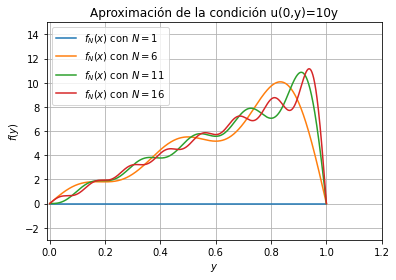

In [ ]:
for i in range(1,20,5):
    plot(x,u_0(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Aproximación de la condición u(0,y)=10y")
xlim([-0.01,1.2]),ylim([-3,15]),grid(),legend()
show()

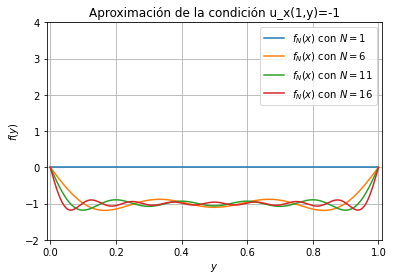

In [ ]:
for i in range(1,20,5):
    plot(x,u_1(x,i),label='$f_N(x)$ con $N=%d$' %i)
plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Aproximación de la condición u_x(1,y)=-1")
xlim([-0.01,1.01]),ylim([-2,4]),grid(),legend()
show()

Graficamos la solución completa:

In [19]:
def u_x_y(x,y,N=8):
    f = zeros( (len(x),len(y)) )
    for i in range(len(x)):
        for n in range(1,N):
          a = (-20*(-1)**n)/(n*pi)
          b = (2*((-1)**n-1)+20*(n*pi)*sinh(n*pi)*(-1)**n)/(n**2*pi**2*cosh(n*pi))
          f[:,i] += sin(n*pi*y)*(a*cosh(n*pi*x[i])+b*sinh(n*pi*x[i]))
    return (f)

In [21]:
x = linspace(0,1.0,1000)
y = linspace(0,1.0,1000)
U = u_x_y(x,y)

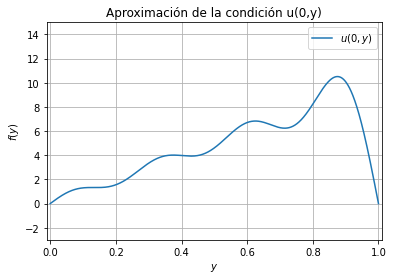

In [22]:
plot(x,U[:,0],label='$u(0,y)$')
plt.xlabel('$y$'); plt.ylabel('$f(y)$'); 
plt.title("Aproximación de la condición u(0,y)")
xlim([-0.01,1.01]),ylim([-3,15]),grid(),legend()
show()

La solución va evolucionando.

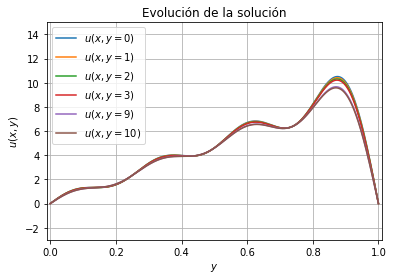

In [23]:
plot(x,U[:,0],label='$u(x,y=0)$') # Mejorar
plot(x,U[:,1],label='$u(x,y=1)$')
plot(x,U[:,2],label='$u(x,y=2)$')
plot(x,U[:,3],label='$u(x,y=3)$')
plot(x,U[:,9],label='$u(x,y=9)$')
plot(x,U[:,10],label='$u(x,y=10)$')
plt.xlabel('$y$'); plt.ylabel('$u(x,y)$'); 
plt.title("Evolución de la solución")
xlim([-0.01,1.01]),ylim([-3,15]),grid(),legend()
show()

Podemos graficar lo anterior en 3D:

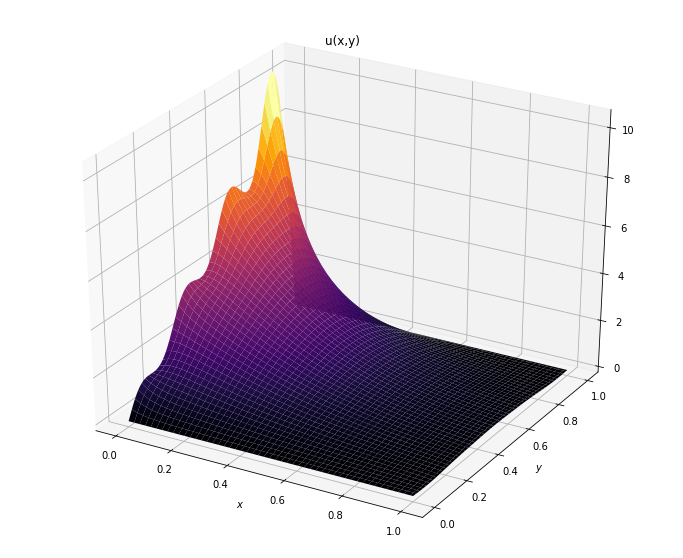

In [24]:
#%matplotlib notebook
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(111, projection="3d")

x = linspace(0,1.0,100)
y = linspace(0,1.0,100)

X,Y = np.meshgrid(x,y)

U = u_x_y(x,y)

plt.xlabel('$x$'); plt.ylabel('$y$'); 
plt.title("u(x,y)")
ax.plot_surface(X, Y, U, cmap="inferno"); #Otros colores:"viridis", "inferno", "plasma"